# This is an example of the curve fitting performed for the ML analysis

In [10]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
# import pandas as pd

# import xlrd
from scipy import interpolate
import matplotlib.ticker as mtick
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
from scipy.optimize import curve_fit

%matplotlib inline


In [2]:
# Load absorption coefficient data (ellipsometry)
File_Ellip = './Data/BA All_edit.txt'
# Load BA n=1-4
Data_El = np.loadtxt(File_Ellip)
Wl_El = Data_El[:,0]
OD_BA_El = Data_El[:,[3,6,9,12]]

# interpolated data n=1-4
OD_int = [interpolate.interp1d(Wl_El, OD_BA_El[:,i]) for i in range(4)]

In [3]:
# Load AbsorptionData
File = './Data/Absorption data.txt'
ODoffset = 0.086
Data = np.loadtxt(File, skiprows=1)
Wl = Data[:,0]
OD_BA = Data[:,1] - ODoffset


In [4]:
# define fit function
Mag = 3e-6
def OD_sum(x, a, b, c, d):# a is Intensity change (Delta I/I), b is time constant (ps)
    y = a*OD_int[0](x)+b*OD_int[1](x)+c*OD_int[2](x)+d*OD_int[3](x)   
    return y*Mag
def OD_sum_slope(x, a, b, c, d, k, x0):# a is Intensity change (Delta I/I), b is time constant (ps)
    y = a*OD_int[0](x)+b*OD_int[1](x)+c*OD_int[2](x)+d*OD_int[3](x) 
    return y*Mag-k*(x-x0)


(0.0, 0.5)

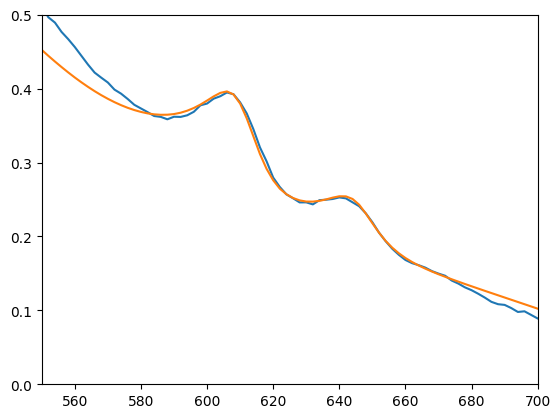

In [11]:
# Visualize: OD
Ptest = [0,0,.30,.225,1.45e-3,763]
fig = plt.figure()
plt.plot(Wl+2,OD_BA)
plt.plot(Wl,OD_sum_slope(Wl,*Ptest))
plt.xlim([550,700])
plt.ylim([0,0.5])

In [6]:
# fit
# FitSelect = np.all([Wl>=588,Wl<=660],axis=0)
FitSelect = np.all([Wl>=565,Wl<=680],axis=0)
WlOffset = 2
P0 = [0,0,.32,.25,1.4e-3,760]
PBound = [[0,0,0,0,.5e-3,600],[.01,.1,.6,.6,3e-3,900]]#n=4
# P = []

Popt, Pcov = curve_fit(OD_sum_slope, Wl[FitSelect]+WlOffset, OD_BA[FitSelect], p0=P0,bounds=PBound)
Perr = np.sqrt(np.diag(Pcov))


[2.76900898e-14 3.41780048e-02 3.03187459e-01 2.25649479e-01
 1.43449480e-03 7.63343901e+02]
[1.20120372e+02 7.66863296e-03 6.92695859e-03 1.04956721e-02
 6.73456730e-05 4.38402619e+00]


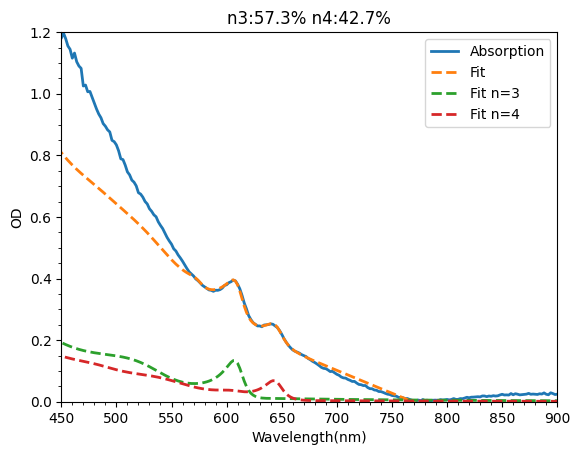

In [12]:
# Visualize: OD
# Ptest = [0,0,.32,.25,1.4e-3,760]
Perc = Popt[3]/(Popt[2]+Popt[3])

fig = plt.figure()
plt.plot(Wl+WlOffset,OD_BA,linewidth=2)
plt.plot(Wl,OD_sum_slope(Wl,*Popt),'--',linewidth=2)
plt.plot(Wl,OD_int[2](Wl)*Mag*Popt[2],'--',linewidth=2)
plt.plot(Wl,OD_int[3](Wl)*Mag*Popt[3],'--',linewidth=2)
plt.xlim([450,900])
plt.ylim([0.0,1.2])
plt.legend(['Absorption','Fit','Fit n=3','Fit n=4'])
plt.title('n3:'+'%.1f'%((1-Perc)*1e2)+'% n4:'+'%.1f'%((Perc)*1e2)+'%')
plt.xlabel('Wavelength(nm)')
plt.ylabel('OD')
ax=plt.gca()
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
# plt.savefig('D:/_Work/Rice - Mohite Lab/20210305_Paper3/SpectroData/2021-03-05/AbsFit (zoom out).png',dpi=300)

print(Popt[0:6])
print(Perr[0:6])